# EDA on Haberman dataset

**Import the libraries**

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [3]:
# Ignore warnings
warnings.filterwarnings("ignore")

**Import dataset**

In [4]:
# Import dataset from csv file

haberman_df = pd.read_csv('haberman.csv')

# View dataset
haberman_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Overview of dataset**

In [5]:
# Get columns
haberman_df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

It has age, year, nodes as independant variables / featues and status as dependant variable.

In [6]:
# Get the unique status values and their count
haberman_df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

there are more datapoints/ obervations for status 1 than status 2. Its a imbalanced dataset.

**2D scatter plot analysis using pairplot**

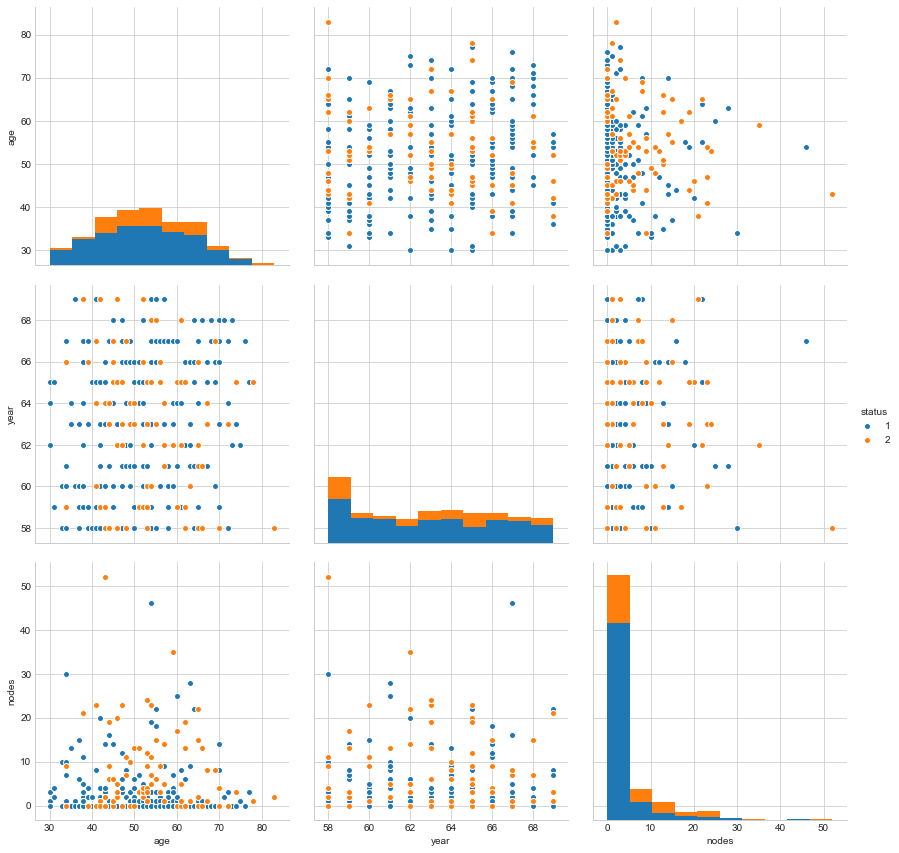

In [7]:
# Get a scatter view of haberman dataset for different feature pairs
sns.set_style('whitegrid')
sns.pairplot(haberman_df, hue="status", size = 4, vars = ["age", "year", "nodes"])
plt.show()

***Oberservations:***
1. From the pairplot between age, years and nodes, its difficult to separte the datapoints of status 1 and 2.
2. many datapoints exists for the less value of nodes. For higher values, there are less counts.

**PDF analysis**

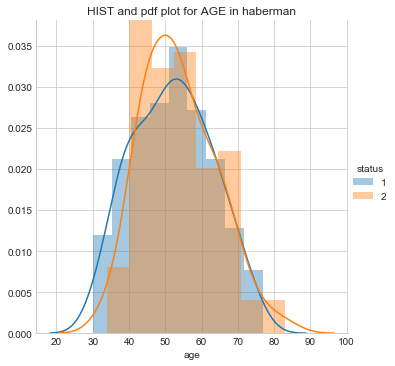

In [8]:
# PDF of haberman dataset for 'age' column

sns.FacetGrid(haberman_df, hue = "status", size = 5) \
    .map(sns.distplot, "age") \
    .add_legend();
plt.title("HIST and pdf plot for AGE in haberman")
plt.show()

***Obervation:***
1. The count of data points with status 1 is more than that of status 2. But all the points lies in almost same age range.
2. With age, its difficult to predict the status for a new data point.

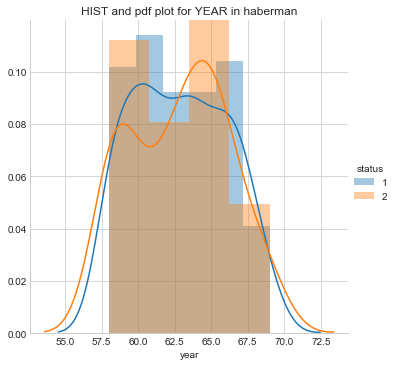

In [9]:
# PDF of haberman dataset for 'year' column

sns.FacetGrid(haberman_df, hue = "status", size = 5) \
    .map(sns.distplot, "year") \
    .add_legend();
plt.title("HIST and pdf plot for YEAR in haberman")
plt.show()

***Obervations:***
1. The year column presents the the year in which the patient had his/her operatoion. So this should not be considered as a parameter to predict the status for a new patient.
2. Also as per the above diagram, it doesnt show much difference for the datapoints of status 1 and 2. The data point with a certain year can have any status.

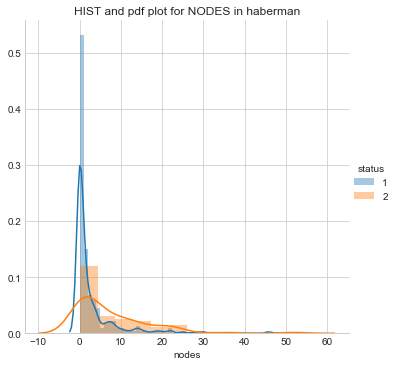

In [10]:
# PDF of haberman dataset for 'nodes' column

sns.FacetGrid(haberman_df, hue = "status", size = 5) \
    .map(sns.distplot, "nodes") \
    .add_legend();
plt.title("HIST and pdf plot for NODES in haberman")
plt.show()

***Obervations:***
1. The plot with nodes gives some informative result.
2. Range of nodes is 0, 52. For data points in range 0 and 4, count for status 1 is much more higher than status 2. So for a patient with nodes 0 to 4 has more chance to have status 1.
3. As its an imbalanced dataset, there is a possibility that, datapoints in range 0 and 4 can have status 2.

In [11]:
# Separate data points for status 1 and 2 [column = 'age']

habernate_age_status1 = haberman_df['age'][haberman_df['status'] == 1]
habernate_age_status2 = haberman_df['age'][haberman_df['status'] == 2]

**CDF Analysis**

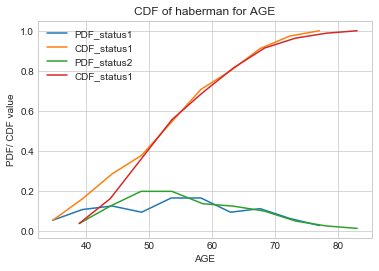

In [12]:
# Calculate PDF and CDF for data points for age column with status 1 and 2 separately.

# For status 1
counts, bin_edges = np.histogram(habernate_age_status1, bins = 10, density = True)

pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = "PDF_status1")
plt.plot(bin_edges[1:], cdf, label = "CDF_status1")

# For status 2
counts, bin_edges = np.histogram(habernate_age_status2, bins = 10, density = True)

pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = "PDF_status2")
plt.plot(bin_edges[1:], cdf, label = "CDF_status1")

plt.xlabel("AGE")
plt.ylabel("PDF/ CDF value")
plt.title("CDF of haberman for AGE")
plt.legend()
plt.show()

***Obervations***

In the above plot, we can clearly see that the feature 'age' cant determine the status as both PDF and CDF curve are not separted enough to determine it. 

In [13]:
# Separate data points for status 1 and 2 [column = 'nodes']

habernate_nodes_status1 = haberman_df['nodes'][haberman_df['status'] == 1]
habernate_nodes_status2 = haberman_df['nodes'][haberman_df['status'] == 2]

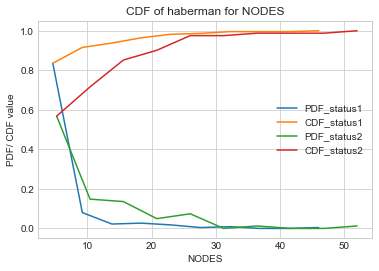

In [14]:
# Calculate PDF and CDF for data points for nodes column with status 1 and 2 separately.

# For status 1
counts, bin_edges = np.histogram(habernate_nodes_status1, bins = 10, density = True)

pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = "PDF_status1")
plt.plot(bin_edges[1:], cdf, label = "CDF_status1")

# For status 2
counts, bin_edges = np.histogram(habernate_nodes_status2, bins = 10, density = True)

pdf = counts/ sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf, label = "PDF_status2")
plt.plot(bin_edges[1:], cdf, label = "CDF_status2")

plt.xlabel("NODES")
plt.ylabel("PDF/ CDF value")
plt.legend()
plt.title("CDF of haberman for NODES")
plt.show()

***Obervations:***
1. For both the status (1,2), there is not much difference in CDF values. Like PDF curves, the CDF curves are also not well separated.
2. Patients with nodes more than 25 have equal chance of having status 1 and 2.
3. Patients with nodes from 0 to 3-5 have more chance (about 10-20 %) to have status as 1 than 2.
4. But gradually the chances for both status values becomes similar.
5. If we predict the status based upon the node values in range 0-25, then there is 80% to 95% chance that they will fall in status group 1. But we need to consider the chance for status 2 also, as there is 55% to 95% chance for status 2 as well.
6. We can make a if_else condition based on the nodes to differentiate patients as follows.

    if(nodes > 0 and nodes < 10) {
        status = 1
    } else {
        status = 2
    }
    
    The boundary condition can be further limited (from 10 to 4 or 5), as we have much more status 1 count for these range with     higher chance/probability.
    
    But with above classification, there is 60% - 70% chance of error. if we declare a patient's status as 1 having node=5, then     there is approx 62% chance that the actual status value for that patient is 2.
    
7. As its an imbalanced dataset, the above model for classification can lead wrong output.    

**Box Plot analysis**

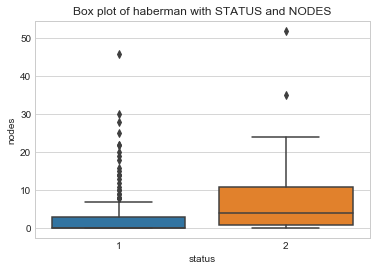

In [15]:
# Plot boxplots for nodes column values.

sns.boxplot(data = haberman_df, x= "status", y= "nodes")

plt.title("Box plot of haberman with STATUS and NODES")
plt.show()

***Obervations:***
1. In the above box plot, its clealy visible that both status 1 and status 2 data are not separated. So for a given range of nodes, they can fall into any of the status. 
2. For status 2, we can identify the 25th, 50th and 75th percntile values as approx 1, 4, 11. But for status 1, the plot is so compact that, it seems 75th percentile value is approx. 4 or 5.
3. We can only determine the status for lower range values. 50% of status 2 data points have nodes <= 4, but more than 75% of status 1 data points have nodes <= 4.
4. So we can apply classification condition as follows,
   
   We have just limited the boundary for the status 1 classification.
   
   if(nodes > 0 and nodes <= 4){
       status = 1
   } else {
       status = 2
   }
   
   The boundary value 4 can further reduced to 2. But it wont have much impact on the classification.
      
5. But as metioned, dataset is imbalanced, so with above condition, we can get 50% error, as 50% of status 2 can have nodes <=4.   

**Violin Plot analysis**

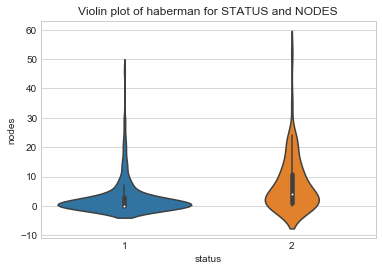

In [16]:
sns.violinplot(data = haberman_df, x = "status", y = "nodes", size = 9)

plt.title("Violin plot of haberman for STATUS and NODES")
plt.show()

***Obervations:***
1. Violin plot is a combination of pdf and boxplot. So we can see the same response that we have already got in those plots.
2. For range 0-3, there is more chance that the data point will have status 1. But still as 75% of data of status 2 also have similar nodes, we cant fully depend upon these plots and nodes values.

**Overall, we understood that 'nodes' is the only feature that can possibly determine/ predict the status of a new data point**

**Quantifying the analysis**

In [17]:
# Calculate median value
print(np.median(habernate_nodes_status1))
print(np.median(habernate_nodes_status2))

0.0
4.0


In [18]:
# Calculate the quanitiles

print(np.percentile(habernate_nodes_status1, np.arange(0, 100, 25)))
print(np.percentile(habernate_nodes_status2, np.arange(0, 100, 25)))

[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


***Obervations:***

1. We can see there is huge difference in between status 1 values and status 2 values in terms of median and quantiles values. 
2. But unfortunately, we cant relay upon those values as the number of data points for status 1 and status 2 are not well distributed or they are imbalanced. 
3. We need almost equal number of observations for both status 1 and 2, so that we can determine the classes by calculating the percentile/ median values, also by plots.

**Conclusion**

From the above analysis, we can conclude as follows,
1. The dataset is imbalanced. The count for status 1 is 225 and for status 2, its only 84. So its difficult to determine the status.
2. Both age and year column values dont have much impact on the classifion.
3. Nodes column values have some impact in determining the status of a new data point.
4. From plots, we can approxmately set a boundary for both catagories as follows,
    
    if(nodes > 0 and nodes <= 4){
       status = 1
   } else {
       status = 2
   }
   
   But still, there is much chance that we get wrong output as values at 50% or 75% percentiles are similar for both groups.
5. We can have a better classification conditions if we can have more data points for status 2 to analyse.   